In [1]:
!pip install scikit-tda

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 20.5 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=30341b058d4fbe53ff7823fb272e41bb6ec21a48bd72303b9e035391250f5488
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
!pip install ripser
!pip install Cython

(92, 92)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


/usr/local/lib/python3.11/dist-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


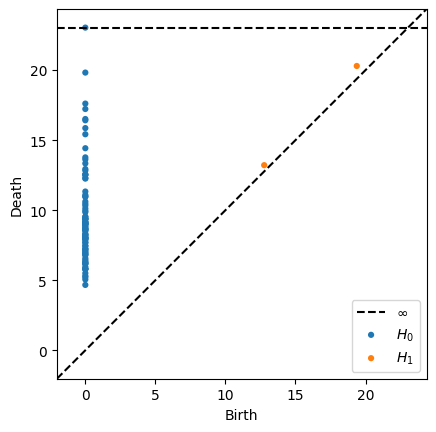

In [27]:
# https://docs.scikit-tda.org/en/latest/notebooks/scikit-tda%20Tutorial.html#1.1.3.-Input-option:-Distance-matrix
import numpy as np
from ripser import Rips
import pandas as pd
df = pd.read_csv('/content/sample_data/cdhwdata_3.csv')
df = df.to_numpy()
matrix = np.delete(df, -1, axis=1)
print(matrix.shape)
rips = Rips()
diagrams = rips.fit_transform(matrix)
rips.plot(diagrams)

In [29]:
!pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.0 MB/s eta 0:00:00


In [30]:
# https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-simplicial-complexes-from-distance-matrix.ipynb
import gudhi as gd
from pylab import *

In [40]:
from sklearn.manifold import MDS
df = pd.read_csv('/content/sample_data/cdhwdata_3.csv')
df = df.to_numpy()
matrix = np.delete(df, -1, axis=1)
sym_matrix = np.tril(matrix) + np.transpose(np.tril(matrix, k=-1))
embedding = MDS(n_components=3, dissimilarity='precomputed')
print(sym_matrix.shape)
X_transformed = embedding.fit_transform(sym_matrix)
X_transformed.shape

(92, 92)


(92, 3)

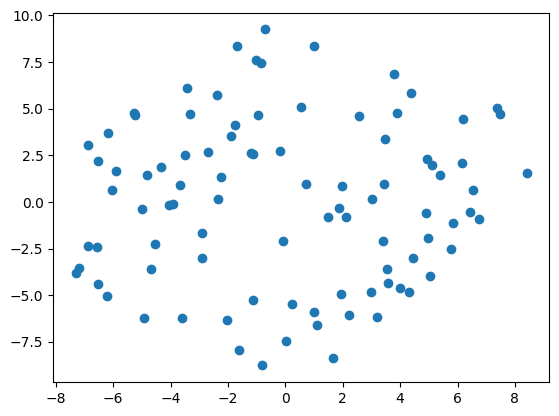

In [41]:
fig = plt.figure()
plt.scatter(X_transformed[:,0], X_transformed[:,1], label = 'MDS')

In [43]:
alpha_complex = gd.AlphaComplex(points=X_transformed)
simplex_tree = alpha_complex.create_simplex_tree()

In [44]:
simplex_tree.dimension()

3

In [45]:
persistence_diagram = simplex_tree.persistence()

/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


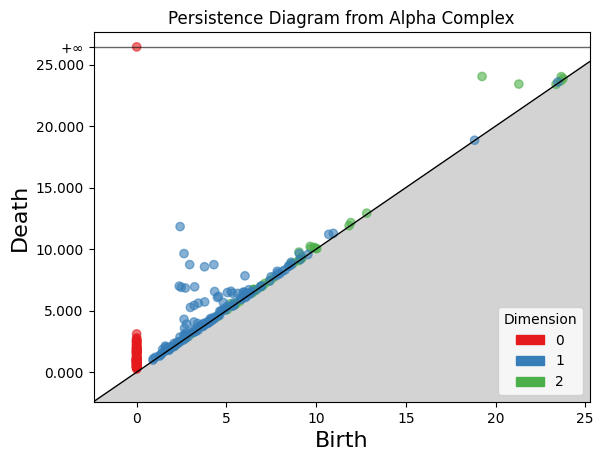

In [47]:
gd.plot_persistence_diagram(persistence_diagram, legend=True)
plt.title("Persistence Diagram from Alpha Complex")
plt.xlabel("Birth")
plt.ylabel("Death")
plt.show()